In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
#load dataset
data = pd.read_csv("../../data/clean/mbti_4.csv")
data

,type,is_E,is_N,is_F,is_J,posts,cleans,com_stmt,pos_stmt,neg_stmt,...,xd,ya,yep,yesterday,yet,young,younger,youtub,yup,zone
0,INFP,0,1,1,0,"'probably chiming in real late, but if he's an...",probabl chime real late enfp least much extrov...,0.9994,0.161,0.098,...,0,0,0,1,0,1,0,0,0,0
1,INFP,0,1,1,0,'I really like the way you put that. It makes ...,realli like way put make lot sens especi drama...,0.9918,0.116,0.094,...,0,0,0,1,2,0,0,1,0,0
2,INFP,0,1,1,0,'I thought this article was very enlightening....,thought articl veri enlighten basic assert nat...,0.9998,0.201,0.077,...,0,0,1,0,1,0,0,1,0,0
3,INFP,0,1,1,0,'I am an INFP and that sounds way too stereoty...,infp sound way stereotyp becom want without ne...,0.9998,0.186,0.065,...,0,0,0,1,0,0,2,0,0,0
4,INFP,0,1,1,0,"'I don't really relate to most of it, to be ho...",realli relat honest sensit sound realli realli...,0.9996,0.140,0.051,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,ENFJ,1,1,1,1,'Hey all! Jeez I'm still having laptop issues!...,hey jeez still laptop issu jawz alway prefer n...,0.9996,0.172,0.079,...,0,0,1,0,0,0,1,0,0,0
620,ENFJ,1,1,1,1,'One of my biggest turn-off's and I think its ...,one biggest turn think enfj thing exclud peopl...,0.9999,0.212,0.058,...,0,0,0,0,0,0,0,0,1,0
621,ENFJ,1,1,1,1,"'Dear Universe, We had a fight last night. B...",dear univers fight last night think communic p...,0.9997,0.202,0.097,...,0,0,0,0,0,0,0,0,0,0
622,ENFJ,1,1,1,1,"'Hm, I think it's been a bit too long since I ...",hm think bit long sinc first saw seri recal ge...,0.9999,0.227,0.069,...,0,0,0,0,1,0,0,0,0,0


In [3]:
#only one row contains Nan value, removed that row
data.dropna(inplace=True)

In [6]:
#train / test split and feature / target selection
train, test = train_test_split(data, test_size = 0.1, random_state=88, stratify=data.type)
features = ['com_stmt', 'pos_stmt', 'neg_stmt', 'neu_stmt', 'word_count',
            'unique_count', 'emoji_count', 'qe_mark', 'ex_mark', 'el_mark',
            'upper_count', 'url_count', 'img_count']
X_train, y_train = train[features], train['is_J']
X_test, y_test = test[features], test['is_J']
X_train_2, X_test_2 = train.iloc[:, 7:], test.iloc[:, 7:]
# set 5Fold-Cross Validation
cv = KFold(n_splits=5,random_state=88,shuffle=True)

# Modeling
## 1. Logistic Regression Model
- In the logistic regression, we choose all numerical feature to predict all four pairs of MBTI personalities, the result of last pair J/P yields a 0.46 accuracy.

In [7]:
#logistic regression
import statsmodels.formula.api as smf
# Fit the logistic regression model
logreg = smf.logit(formula = 'is_J ~ com_stmt + pos_stmt + neg_stmt + neu_stmt \
+ word_count + unique_count + emoji_count + qe_mark + ex_mark + el_mark + \
upper_count + url_count + img_count', data = train).fit()

y_prob = logreg.predict(test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

model_logreg_acc = sum(y_pred == y_test) / len(test)#calcuate logistic accuracy accuracy
print(f'Logistic Regression Test Accuracy: {model_logreg_acc:.4f}')

Optimization terminated successfully.
         Current function value: 0.683421
         Iterations 6
Logistic Regression Test Accuracy: 0.4603


In [8]:
#logreg model summary
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_J   No. Observations:                  561
Model:                          Logit   Df Residuals:                      547
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                 0.01403
Time:                        14:42:02   Log-Likelihood:                -383.40
converged:                       True   LL-Null:                       -388.85
Covariance Type:            nonrobust   LLR p-value:                    0.6183
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -49.7347    172.034     -0.289      0.773    -386.914     287.445
com_stmt        -0.5115      0.402     -1.273      0.203      -1.299       0.276
pos_stmt        52.2831    172.033      0.304      0.761    -284.895     389.461
neg_stmt        45.5277    171.714      0.265      0.791    -291.025     382.080
neu_stmt        51.7200    172.007      0.301      0.764    -285.407     388.847
word_count      -0.0124      0.078     -0.160      0.873      -0.165       0.140
unique_count    -0.0650      0.178     -0.366      0.714      -0.413       0.283
emoji_count      2.3903      3.062      0.781      0.435      -3.611       8.392
qe_mark         -3.2957      1.526     -2.160      0.031      -6.287      -0.305
ex_mark          0.2666      0.783      0.341      0.733      -1.268       1.801
el_mark         -0.9765      1.292     -0.756      0.450      -3.508       1.555
upper_count     -0.1537      0.367     -0.418      0.676      -0.874       0.567
url_count       -1.4762      5.989     -0.246      0.805     -13.214      10.261
img_count        0.6401      8.641      0.074      0.941     -16.296      17.576
================================================================================
"""

In [10]:
#logreg auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
model_logreg_auc = roc_auc#Calculate logistic AUC
print(f'Logistic Regression Test AUC: {model_logreg_auc:.4f}')

Confusion Matrix : 
 [[12 20]
 [14 17]]
Logistic Regression Test AUC: 0.4829


## 2. Simple Random Forest Model/ Grid Search 5Fold Cross-Validation Random Forest Model
- The simple random forest model (no hyperparameter tuning) yields a 0.6825 accuracy which outperforms the logistic regression model. We further apply grid search with 5Fold cross-validation to find the optimal max_feature. The accuracy is gradually increasing between 1-50 max_feature, and yields a highest accuracy 0.6984 with max_feature=70.

In [11]:
#Simple Version Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=88).fit(X_train_2, y_train)
y_pred_rf = rf.predict(X_test_2)
model_rf_acc = sum(y_pred_rf == y_test) / len(y_test) #TODO: calculate random forest accuracy
print(f'Random Forest Test Accuracy: {model_rf_acc:.4f}')

Random Forest Test Accuracy: 0.6825


In [17]:
#Grid-Search 5Fold-Cross-validation Random Forest to find best max_feature
grid_values = {'max_features': np.linspace(1,100, 100, dtype='int32'),
               'random_state': [88]}
rf2 = RandomForestClassifier(random_state=88)
rf2_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=1)
rf2_cv.fit(X_train_2, y_train)
y_pred_rf2 = rf2_cv.best_estimator_.predict(X_test_2)
model_rf2_acc = sum(y_pred_rf2 == y_test) / len(y_test)
print(f'CV Random Forest Test Accuracy: {model_rf2_acc:.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Random Forest Test Accuracy: 0.6984


In [21]:
rf2_cv.best_estimator_

RandomForestClassifier(max_features=70, random_state=88)

In [23]:
pd.DataFrame(rf2_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093177,0.004543,0.012600,0.000406,1,88,"{'max_features': 1, 'random_state': 88}",0.548673,0.508929,0.526786,0.562500,0.607143,0.550806,0.033603,96
1,0.094804,0.006327,0.012417,0.000478,2,88,"{'max_features': 2, 'random_state': 88}",0.566372,0.508929,0.580357,0.571429,0.508929,0.547203,0.031570,97
2,0.103393,0.014739,0.012301,0.000264,3,88,"{'max_features': 3, 'random_state': 88}",0.539823,0.535714,0.580357,0.500000,0.678571,0.566893,0.061373,91
3,0.102124,0.001349,0.012526,0.000316,4,88,"{'max_features': 4, 'random_state': 88}",0.619469,0.508929,0.562500,0.464286,0.625000,0.556037,0.062384,95
4,0.116435,0.015499,0.016702,0.006672,5,88,"{'max_features': 5, 'random_state': 88}",0.530973,0.580357,0.526786,0.526786,0.535714,0.540123,0.020385,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.280257,0.002977,0.011208,0.000048,96,88,"{'max_features': 96, 'random_state': 88}",0.663717,0.660714,0.660714,0.642857,0.633929,0.652386,0.011820,32
96,0.281463,0.003462,0.011233,0.000119,97,88,"{'max_features': 97, 'random_state': 88}",0.734513,0.633929,0.678571,0.642857,0.598214,0.657617,0.046173,26
97,0.324138,0.025484,0.011867,0.000283,98,88,"{'max_features': 98, 'random_state': 88}",0.690265,0.651786,0.633929,0.616071,0.678571,0.654125,0.027442,30
98,0.284474,0.003494,0.011150,0.000086,99,88,"{'max_features': 99, 'random_state': 88}",0.734513,0.678571,0.714286,0.660714,0.660714,0.689760,0.029722,2


In [19]:
rf2_df = pd.DataFrame(rf2_cv.cv_results_)[['param_max_features', 'mean_test_score']]
rf2_df = rf2_df.set_index('param_max_features')
rf2_df

,mean_test_score
param_max_features,
1,0.550806
2,0.547203
3,0.566893
4,0.556037
5,0.540123
...,...
96,0.652386
97,0.657617
98,0.654125


<AxesSubplot:xlabel='param_max_features'>

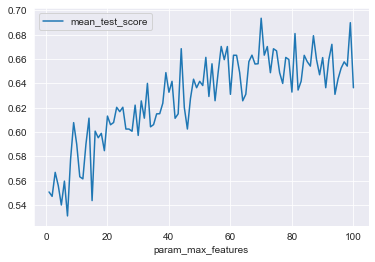

In [20]:
#max_features & acc lineplot, higher the number of features, higher accuracy
sns.lineplot(data=rf2_df)


## 3. Gradient Boosting Model

In [24]:
#Gradient Boosting Classifier (got high acc, skip grid-search)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10,
                                 random_state=88).fit(X_train_2, y_train)
y_pred_gbc = gbc.predict(X_test_2)
model_gbc_acc = sum(y_pred_gbc == y_test) / len(y_test)# Calculate boosting accuracy
print(f'GBC Test Accuracy: {model_gbc_acc:.4f}')

GBC Test Accuracy: 0.7460


## 4. Adaboost Model


In [25]:
#Adaboost Classifier (simple version, grid-search cv not runnable)
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=88).fit(X_train_2, y_train)
#abc_grid = {'base_estimator' : ['gini', 'entropy'],
#            'algorithm' : ['SAMME', 'SAMME.R'],
#            'n_estimators' : [1],
#            'learning_rate' : np.linspace(0.1, 1, 10)
#            }
#abc_search = GridSearchCV(abc, param_grid=abc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
y_pred_abc = abc.predict(X_test_2)
model_abc_acc = sum(y_pred_abc == y_test) / len(y_test)
print(f'ABC Test Accuracy: {model_abc_acc:.4f}')
#print(abc_search.best_score_)
#abc_best = abc_search.best_estimator_

ABC Test Accuracy: 0.6825


## 5. Grid-Search 5-Cross-Validation Stocastic Gradient Descent Model

In [26]:
##Grid-Search 5-Cross-Validation Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=88)
sgdc_grid = {"loss": ["hinge"],
             "penalty": ["l1", "l2"],
             "alpha": np.linspace(0.0001,0.0005,5)}
sgdc_search = GridSearchCV(sgdc, param_grid=sgdc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
#y_pred_sgdc = sgdc.predict(X_test_2)
#model_sgdc_acc = sum(y_pred_sgdc == y_test) / len(y_test)
print(sgdc_search.best_score_)
sgdc_best = sgdc_search.best_estimator_

0.7379582806573957


## 6. Simple Support Vector Classifier / Grid-Search 5Fold Cross-Validation Suppoet Vector Model


In [27]:
#Support Vector Classifier (simple version -- no grid search / no cv)
from sklearn.svm import SVC
svc = SVC(C=0.1).fit(X_train_2, y_train)
y_pred_svc = svc.predict(X_test_2)
model_svc_acc = sum(y_pred_svc == y_test) / len(y_test)
print(f'SVC Test Accuracy: {model_svc_acc:.4f}')

SVC Test Accuracy: 0.4921


In [39]:
#Grid-Search 5-Cross-Validation Support Vector Classifier (took too long to run)
from sklearn.svm import SVC
svc = SVC(random_state=88, probability=True)
svc_grid = {"kernel": ["rbf"],
            "gamma": [0.1, 0.2, 0.3, 0.4, 0.5],
            "C" : [0.1, 0.2, 0.3, 0.4, 0.5]
             }
svc_search = GridSearchCV(svc, param_grid=svc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
#y_pred_sgdc = sgdc.predict(X_test_2)
#model_sgdc_acc = sum(y_pred_sgdc == y_test) / len(y_test)
print(svc_search.best_score_)
svc_best = svc_search.best_estimator_

0.4706226295828066


## 7. Grid-Search 5Fold Cross-Validation K-Nearest Neighbors Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
#Elbow method to find optimal k
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_2,y_train)
    pred_i = knn.predict(X_test_2)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

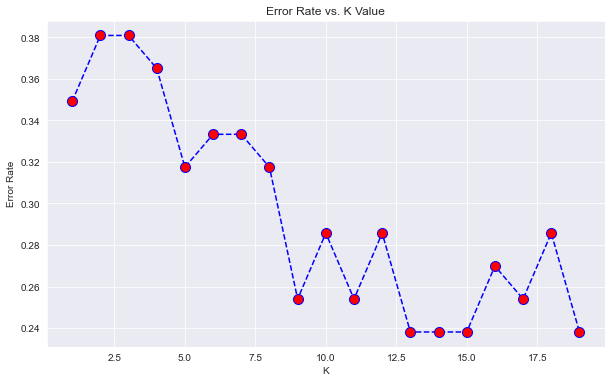

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle ='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#The plot shows the optimal n_neighbors=9

In [36]:
#Grid-Search 5Fold-Cross-Validation K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_grid = {'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'leaf_size' : [5, 10, 20, 30],
            }
knn_search = GridSearchCV(knn, param_grid=knn_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
print(knn_search.best_score_)
knn_best = knn_search.best_estimator_

0.6666403286978507


## 8. Simple LDA Model

In [37]:
#LDA Classifier with all 16 types
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
y_train_2, y_test_2 = train['type'], test['type']
lda = LinearDiscriminantAnalysis().fit(X_train_2, y_train_2)
model_lda_acc = lda.score(X_test_2, y_test_2)# Calculate LDA accuracy
print(f'LDA Test Accuracy: {model_lda_acc:.4f}')

LDA Test Accuracy: 0.3016


## Model Summary

In [40]:
models_result = pd.DataFrame({
    'Model':['Logistic Regression', 'Simple Random Forest', 'Random Forest', 'Simple Gradient Boosting', 'Simple AdaBoost', 'Stochastic Gradient Descent', 'Simple Support Vector Classifier','Support vector Classifier', 'K-Nearest Neighbors', 'LDA-16types'],
    'Accuracy':[model_logreg_acc,  model_rf_acc, model_rf2_acc, model_gbc_acc, model_abc_acc, sgdc_search.best_score_, model_svc_acc, svc_search.best_score_, knn_search.best_score_, model_lda_acc]})

In [41]:
models_result

,Model,Accuracy
0,Logistic Regression,0.460317
1,Simple Random Forest,0.682540
2,Random Forest,0.698413
3,Simple Gradient Boosting,0.746032
4,Simple AdaBoost,0.682540
5,Stochastic Gradient Descent,0.737958
6,Simple Support Vector Classifier,0.492063
7,Support vector Classifier,0.470623
8,K-Nearest Neighbors,0.666640
9,LDA-16types,0.301587
